In [2]:
from nibabel.testing import data_path
import numpy as np
import tensorflow as tf
from keras import applications
import nibabel as nib
import keras

In [3]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [5]:
import matplotlib.pyplot as plt
import glob
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import layers

from sklearn.model_selection import train_test_split

In [6]:
Adni_normal_6_months=glob.glob('/home/kushpal/Kushpal/ADNI_Normal/Normal-m06-3.0T(27)/[0-9]*/*/*/*/w*')
Adni_normal_12_months=glob.glob('/home/kushpal/Kushpal/ADNI_Normal/Normal-m12-3.0T(27)/[0-9]*/*/*/*/w*')
Adni_normal_24_months=glob.glob('/home/kushpal/Kushpal/ADNI_Normal/Normal-m24-3.0T(27)/[0-9]*/*/*/*/w*')
Adni_normal_36_months=glob.glob('/home/kushpal/Kushpal/ADNI_Normal/Normal-m36-3.0T(27)/[0-9]*/*/*/*/w*')

Mci_bl_3_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-bl-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_6_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-m06-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_12_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-m12-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_24_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-m24-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_36_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-m36-3.0T (22)/[0-9]*/*/*/*/w*')

Ad_bl_3_months=glob.glob('/home/kushpal/Kushpal/AD-bl-3.0T(22)/[0-9]*/*/*/*/w*')
Ad_6_months=glob.glob('/home/kushpal/Kushpal/AD-m06-3.0T(22)/[0-9]*/*/*/*/w*')
Ad_12_months=glob.glob('/home/kushpal/Kushpal/AD-m12-3.0T(22)/[0-9]*/*/*/*/w*')
Ad_24_months=glob.glob('/home/kushpal/Kushpal/AD-m24-3.0T(22)/[0-9]*/*/*/*/w*')


In [7]:
Adni_normal_image_X=[]
Adni_normal_image_Y=[]
for i in range(len(Adni_normal_6_months)):
    newimg = nib.load(Adni_normal_6_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)
for i in range(len(Adni_normal_12_months)):
    newimg = nib.load(Adni_normal_12_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)
    
for i in range(len(Adni_normal_24_months)):
    newimg = nib.load(Adni_normal_24_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)
for i in range(len(Adni_normal_36_months)):
    newimg = nib.load(Adni_normal_36_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)


Mci_image_X=[]
Mci_image_Y=[]
for i in range(len(Mci_bl_3_months)):
    newimg = nib.load(Mci_bl_3_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
for i in range(len(Mci_6_months)):
    newimg = nib.load(Mci_6_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
for i in range(len(Mci_12_months)):
    newimg = nib.load(Mci_12_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
    
for i in range(len(Mci_24_months)):
    newimg = nib.load(Mci_24_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
    
for i in range(len(Mci_36_months)):
    newimg = nib.load(Mci_36_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)


Ad_image_X=[]
Ad_image_Y=[]
for i in range(len(Ad_bl_3_months)):
    newimg = nib.load(Ad_bl_3_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)
for i in range(len(Ad_6_months)):
    newimg = nib.load(Ad_6_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)
for i in range(len(Ad_12_months)):
    newimg = nib.load(Ad_12_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)
    
for i in range(len(Ad_24_months)):
    newimg = nib.load(Ad_24_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)

In [8]:
Total_data_X=[]
Total_data_Y=[]
for i in range(len(Adni_normal_image_X)):
    Total_data_X.append(Adni_normal_image_X[i])
    Total_data_Y.append(Adni_normal_image_Y[i])
for i in range(len(Mci_image_X)):
    Total_data_X.append(Mci_image_X[i])
    Total_data_Y.append(Mci_image_Y[i])
for i in range(len(Ad_image_X)):
    Total_data_X.append(Ad_image_X[i])
    Total_data_Y.append(Ad_image_Y[i])

In [9]:
len(Total_data_X)

303

In [11]:

acc=[]
for i in range(2):
    X_train, X_test, y_train, y_test = train_test_split(Total_data_X, Total_data_Y, test_size=0.33)
    X_train=np.array(X_train)
    y_train=np.array(y_train)
    x_train = X_train.reshape(X_train.shape[0], 121, 145, 121)

    input_shape = (121, 145, 121)
    x_train = x_train.astype('float32')
    y_train = keras.utils.to_categorical(y_train)
    y_old_test=y_test
    y_test = keras.utils.to_categorical(y_test)
    def discriminator_model():
        # After publishing the research I will make it online.
        return model
    model=discriminator_model()
    #print(model.summary())
    model.compile(keras.optimizers.Adam(lr=1e-5), 'categorical_crossentropy', metrics=['accuracy'])
    history=model.fit(x=x_train,y=y_train,batch_size=200, epochs=50,validation_split=0.1)
    X_test=np.array(X_test)
    x_test = X_test.reshape(X_test.shape[0], 121, 145,121)
    x_test = x_test.astype('float32')

    acc.append(model.evaluate(x_test,y_test))

/home/kushpal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_regularizer=<keras.reg...)`


Train on 182 samples, validate on 21 samples
Epoch 1/50
182/182 [==============================] - 2s 12ms/step - loss: 1.2925 - acc: 0.3626 - val_loss: 1.2263 - val_acc: 0.3810
Epoch 2/50
182/182 [==============================] - 1s 8ms/step - loss: 1.0907 - acc: 0.4615 - val_loss: 1.1412 - val_acc: 0.4762
Epoch 3/50
182/182 [==============================] - 1s 8ms/step - loss: 0.9696 - acc: 0.5275 - val_loss: 1.0332 - val_acc: 0.5238
Epoch 4/50
182/182 [==============================] - 1s 8ms/step - loss: 0.9057 - acc: 0.6154 - val_loss: 0.9491 - val_acc: 0.5714
Epoch 5/50
182/182 [==============================] - 1s 8ms/step - loss: 0.8548 - acc: 0.6538 - val_loss: 0.8927 - val_acc: 0.5714
Epoch 6/50
182/182 [==============================] - 1s 8ms/step - loss: 0.8086 - acc: 0.7253 - val_loss: 0.8550 - val_acc: 0.5714
Epoch 7/50
182/182 [==============================] - 1s 8ms/step - loss: 0.7666 - acc: 0.7857 - val_loss: 0.8299 - val_acc: 0.6667
Epoch 8/50
182/182 [==========

In [12]:
newc=np.array(acc).T

In [13]:
newc[1].mean()

0.9550000000000001

#### I fixed batch size and epoch  1000, 50 respectively and the entire model is repated 50 times then I got the prediction accuracy on an average  0.958399 on testing data  

Text(0, 0.5, 'Accuracy')

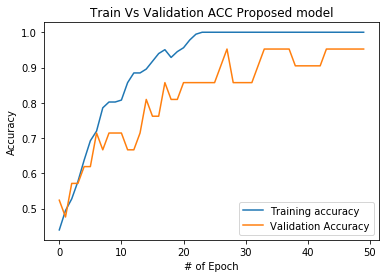

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training accuracy' ,'Validation Accuracy'])
plt.title("Train Vs Validation ACC Proposed model")
plt.xlabel("# of Epoch")
plt.ylabel("Accuracy")

In [15]:
y_pred=model.predict_classes(x_test)

In [38]:
y_test_old=np.array(y_old_test)

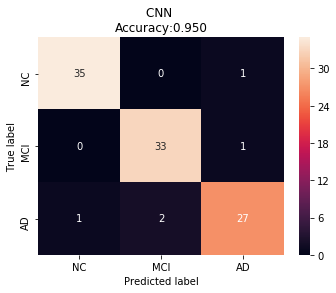

In [39]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
cm = confusion_matrix(y_test_old, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['NC','MCI','AD'], 
                     columns = ['NC','MCI','AD'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('CNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_old, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()